# 라이브러리

In [88]:
import requests
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
import folium
import json
warnings.filterwarnings(action='ignore')

## 함수 : API KEY 입력 -> DataFrame 추출

In [89]:
def makeDF(url, serviceKey, pageNo, numOfRows, resultType='json'):
  params ={'serviceKey' : serviceKey, 'pageNo' : pageNo, 'numOfRows' : numOfRows, 'resultType' : resultType}
  response = requests.get(url, params=params)
  data = response.content.decode()
  
  data_title = url.split('/')[-1]
  return pd.DataFrame(pd.read_json(data)[data_title]['body']['items']['item'])

# 상권 변화지표

In [90]:
# Python3 샘플 코드 #

url = 'http://apis.data.go.kr/6260000/BusanCommercialChangeService/getCommercialChangeList'
serviceKey = 'sDfk9Qyuq5+oRZaD0XyZ+Zohtbmixn0X3VlBiZHMQAM5OBCSCn+ZTvqoiWBPXS+tZy4mMtWkIUnS6XSpfgJm2w=='
pageNo = '1'
numOfRows = '447' # total : 447 rows
resultType = 'json'

# Change Indicator
df_ci = makeDF(url, serviceKey, pageNo, numOfRows, resultType)

In [92]:
# columns = {'type_nm' : '상권_변화_지표_명',
#            'comm_nm' : '상권_코드_명',
#            'change_indicator_nm' : '상권_구분_코드_명',
#            'average_open_months' : '운영_영업_개월_평균',
#            'average_close_months' : '폐업_영업_개월_평균',
#            'busan_average_open_months' : '부산_운영_영업_개월_평균',
#            'busan_average_close_months' : '부산_폐업_영업_개월_평균'}

# df_ci = df_ci.rename(columns = columns)

In [93]:
# df_ci.to_csv('./data2/부산광역시_상권_변화지표정보.csv', index = False)

In [94]:
df_ci = pd.read_csv('./data2/부산광역시_상권_변화지표정보.csv')

In [95]:
df_ci.head(3)

,상권_변화_지표_명,상권_코드_명,상권_구분_코드_명,운영_영업_개월_평균,폐업_영업_개월_평균,부산_운영_영업_개월_평균,부산_폐업_영업_개월_평균
0,전통상권,해운대시장,상권확장,0,120,50,44
1,전통상권,학장반도보라상가,다이나믹,30,1,50,44
2,전통상권,하이타운상가백화점,다이나믹,26,36,50,44


In [96]:
df_ci.shape

(477, 7)

# 상권 집객시설
- `hos_total` column과 `hot_total` column은 의미는 '병원시설수'로 같음.

In [97]:
# url = 'http://apis.data.go.kr/6260000/BusanCommercialCountingService/getCommercialCountingList'
# serviceKey = 'sDfk9Qyuq5+oRZaD0XyZ+Zohtbmixn0X3VlBiZHMQAM5OBCSCn+ZTvqoiWBPXS+tZy4mMtWkIUnS6XSpfgJm2w=='
# pageNo = '1'
# numOfRows = '384' # total : 384 rows
# resultType = 'json'

# # Attractive Facility
# df_af = makeDF(url, serviceKey, pageNo, numOfRows, resultType)

In [98]:
# columns = {'type_nm' : '상권_변화_지표_명',
#            'comm_nm' : '상권_코드_명',
#            'fac_total' : '집객_시설_수',
#            'gov_total' : '관공서_수',
#            'sch_total' : '학교_시설_수',
#            'hos_total' : '병원_시설_수_1',
#            'bus_total' : '교통_시설_수',
#            'sub_total' : '지하철_수',
#            'hot_total' : '병원_시설_수_2',
#            'sho_total' : '쇼핑_시설_수'
#            }
 
# df_af = df_af.rename(columns = columns)

In [99]:
# df_af.to_csv('./data2/부산광역시_상권_집객시설정보.csv', index = False)

In [100]:
df_af = pd.read_csv('./data2/부산광역시_상권_집객시설정보.csv')

In [101]:
df_af.head(3)

,상권_변화_지표_명,상권_코드_명,집객_시설_수,관공서_수,학교_시설_수,병원_시설_수_1,교통_시설_수,지하철_수,병원_시설_수_2,쇼핑_시설_수
0,골목상권,황령대로489번길,6,0,0,4,2,0,0,0
1,골목상권,황령대로319번가길,21,1,0,5,15,0,0,0
2,골목상권,해운대로81번길,3,1,1,1,0,0,0,0


In [102]:
df_af.shape

(384, 10)

# 상권 점포이력
- 공공데이터포털에 데이터가 게시된 일자는 2021년 11월 29일이지만
- 가장 최근의 데이터 `2021년 4월 30일`에 개업한 점포에 대한 데이터임.


In [103]:
url = 'http://apis.data.go.kr/6260000/BusanCommercialHistoryService/getCommercialHistoryList'
serviceKey = 'sDfk9Qyuq5+oRZaD0XyZ+Zohtbmixn0X3VlBiZHMQAM5OBCSCn+ZTvqoiWBPXS+tZy4mMtWkIUnS6XSpfgJm2w=='
pageNo = '28'
numOfRows = '10000' # total : 279096 rows
resultType = 'json'

# Store History
df_sh = makeDF(url, serviceKey, pageNo, numOfRows, resultType)

In [198]:
url = 'http://apis.data.go.kr/6260000/BusanCommercialHistoryService/getCommercialHistoryList'
serviceKey = 'sDfk9Qyuq5+oRZaD0XyZ+Zohtbmixn0X3VlBiZHMQAM5OBCSCn+ZTvqoiWBPXS+tZy4mMtWkIUnS6XSpfgJm2w=='
pageNo = '28'
numOfRows = '10000' # total : 279096 rows
resultType = 'json'

In [104]:
df_sh = makeDF(url, serviceKey, pageNo = '1', numOfRows = '10000')

for i in tqdm(range(2, 29)):
  pageNumber = str(i)
  df_sh = pd.concat([df_sh, makeDF(url, serviceKey, pageNo = pageNumber, numOfRows = '10000')], ignore_index = True)

df_sh.shape

In [193]:
df_sh = makeDF(url, serviceKey, pageNo = '1', numOfRows = '10000')

In [194]:
columns = {'trdstatenm' : '상태_명',
           'bplcnm' : '상점_명',
           'majornm' : '대분류',
           'minornm' : '중분류',
           'upjongnm' : '업종_명(소분류)',
           'rdnwhladdr' : '주소',
           'apvpermymd' : '개업_일',
           'dcbymd' : '폐업_일',
           'geom' : '좌표'}
 
df_sh = df_sh.rename(columns = columns)

In [195]:
df_sh

,상태_명,상점_명,대분류,중분류,업종_명(소분류),주소,개업_일,폐업_일,좌표
0,영업/정상,통독상회 4호점,외식,호프·간이주점,기타 주점업,"부산광역시 강서구 명지국제7로 111, 상가동 101호 (명지동, LH오션타운)",2020-06-02,,POINT(128.913796013936 35.0974001866424)
1,영업/정상,린푸드,외식,한식음식점,한식 일반 음식점업,"부산광역시 강서구 명지국제12로 43-3, 1층 일부 (명지동)",2020-06-02,,POINT(128.92562878084 35.1048547530175)
2,영업/정상,국제통닭 명지점,외식,호프·간이주점,기타 주점업,"부산광역시 강서구 명지국제5로 142, A동 1층 일부 (명지동)",2020-06-02,,POINT(128.921535160743 35.1065079390958)
3,영업/정상,쿠시타케,외식,일식음식점,일식 음식점업,"부산광역시 강서구 명지국제12로 10, 운정D1타워 101호 (명지동)",2020-06-01,,POINT(128.922123521706 35.1047460172475)
4,영업/정상,거북이동네 부산명지점,외식,한식음식점,한식 일반 음식점업,"부산광역시 강서구 명지국제6로 246, 예성빌딩 105,106,107호 (명지동)",2020-05-25,,POINT(128.923232623953 35.0973588619081)
...,...,...,...,...,...,...,...,...,...
9995,폐업,백두대간,외식,호프·간이주점,기타 주점업,,1995-08-07,2008-06-19,POINT(129.092163150236 35.2713610119105)
9996,폐업,미각,외식,분식전문점,기타 간이 음식점업,,1995-01-26,2007-05-17,POINT(129.090907116593 35.2637385991514)
9997,폐업,가야민물장어구이,외식,한식음식점,한식 일반 음식점업,,1994-12-21,2005-04-15,POINT(129.085472412247 35.2633579327772)
9998,폐업,쉬즈,외식,양식음식점,서양식 음식점업,,1994-06-10,2004-02-23,POINT(129.089626465276 35.2607519191547)


In [106]:
# df_sh.to_csv('./data2/부산광역시_상권_점포이력정보.csv', index = False)

In [238]:
df_sh = pd.read_csv('./data2/부산광역시_상권_점포이력정보.csv')

- 개업일, 폐업일 column은 datatime type으로

In [239]:
# 개업일 오기 수정

df_sh["개업_일"][25544] = '1986-02-17'
df_sh["개업_일"][126926] = '1987-05-13'
df_sh["개업_일"][271616] = '1987-08-28'

df_sh["개업_일"][34090] = '1997-01-09'
df_sh["개업_일"][34091] = '1995-06-02'
df_sh["개업_일"][52518] = '1996-02-23'
df_sh["개업_일"][118750] = '1995-11-06'
df_sh["개업_일"][240395] = '1997-04-16'

In [240]:
df_sh["개업_일"] = pd.to_datetime(df_sh["개업_일"])
df_sh["폐업_일"] = pd.to_datetime(df_sh["폐업_일"])
df_sh.dtypes

상태_명                 object
상점_명                 object
대분류                  object
중분류                  object
업종_명(소분류)            object
주소                   object
개업_일         datetime64[ns]
폐업_일         datetime64[ns]
좌표                   object
dtype: object

In [241]:
df_sh.head()

,상태_명,상점_명,대분류,중분류,업종_명(소분류),주소,개업_일,폐업_일,좌표
0,영업/정상,통독상회 4호점,외식,호프·간이주점,기타 주점업,"부산광역시 강서구 명지국제7로 111, 상가동 101호 (명지동, LH오션타운)",2020-06-02,NaT,POINT(128.913796013936 35.0974001866424)
1,영업/정상,린푸드,외식,한식음식점,한식 일반 음식점업,"부산광역시 강서구 명지국제12로 43-3, 1층 일부 (명지동)",2020-06-02,NaT,POINT(128.92562878084 35.1048547530175)
2,영업/정상,국제통닭 명지점,외식,호프·간이주점,기타 주점업,"부산광역시 강서구 명지국제5로 142, A동 1층 일부 (명지동)",2020-06-02,NaT,POINT(128.921535160743 35.1065079390958)
3,영업/정상,쿠시타케,외식,일식음식점,일식 음식점업,"부산광역시 강서구 명지국제12로 10, 운정D1타워 101호 (명지동)",2020-06-01,NaT,POINT(128.922123521706 35.1047460172475)
4,영업/정상,거북이동네 부산명지점,외식,한식음식점,한식 일반 음식점업,"부산광역시 강서구 명지국제6로 246, 예성빌딩 105,106,107호 (명지동)",2020-05-25,NaT,POINT(128.923232623953 35.0973588619081)


In [242]:
df_sh.shape

(279096, 9)

---

## 상권 변화지표 / 집객시설 정보 있는지 없는지 보기

In [243]:
ci = df_ci[['상권_코드_명', '상권_구분_코드_명']]
af = df_af[['상권_코드_명', '집객_시설_수']]

df_ci_af_join = pd.merge(ci, af, left_on = '상권_코드_명', right_on = '상권_코드_명', how = 'outer')
df_ci_af_join

,상권_코드_명,상권_구분_코드_명,집객_시설_수
0,해운대시장,상권확장,NaN
1,학장반도보라상가,다이나믹,5.0
2,하이타운상가백화점,다이나믹,6.0
3,하단시장,상권축소,1.0
4,충렬상가시장,상권축소,1.0
...,...,...,...
481,충무동해안시장,NaN,31.0
482,사덕시장,NaN,1.0
483,당감시장,NaN,1.0
484,당감골목시장,NaN,1.0


In [244]:
df_ci_af_join[(df_ci_af_join['집객_시설_수']).isnull()]

,상권_코드_명,상권_구분_코드_명,집객_시설_수
0,해운대시장,상권확장,NaN
6,초량시장,정체,NaN
11,좌동재래시장,상권축소,NaN
13,재송한마음시장,상권축소,NaN
14,재송시장,다이나믹,NaN
...,...,...,...
341,낙동대로519번길,상권축소,NaN
345,금정로68번길,다이나믹,NaN
352,금곡대로20번길,상권축소,NaN
363,광안해변로15번길,상권축소,NaN


In [245]:
df_ci_af_join[(df_ci_af_join['상권_구분_코드_명']).isnull()]

,상권_코드_명,상권_구분_코드_명,집객_시설_수
481,충무동해안시장,NaN,31.0
482,사덕시장,NaN,1.0
483,당감시장,NaN,1.0
484,당감골목시장,NaN,1.0
485,금성상가시장,NaN,1.0


In [246]:
df_ci_af_join.dropna(axis = 0)

,상권_코드_명,상권_구분_코드_명,집객_시설_수
1,학장반도보라상가,다이나믹,5.0
2,하이타운상가백화점,다이나믹,6.0
3,하단시장,상권축소,1.0
4,충렬상가시장,상권축소,1.0
5,초읍시장,다이나믹,1.0
...,...,...,...
476,기장역,다이나믹,125.0
477,광안리,상권확장,58.0
478,경성대부경대역_3,다이나믹,24.0
479,경성대부경대역_2,다이나믹,25.0


- 변화지표정보 : 477개
- 집객시설정보 : 384개

- 변화지표에는 있는데 집객시설에는 없는 상권 : 98개
- 집객시설에는 있는데 변화지표에는 없는 상권 : 5개

- 둘 다 있는 것 : 383개


---

## 상권 점포이력정보에 읍면동 column 추가

In [247]:
# # 상권 점포이력정보에서 좌표만 추출 
# # 이후 행정동 정보 얻기 위함
# df_xy = df_sh[["좌표"]].apply(lambda x: x.str[6:-1])
# df_xy["longitude"] = df_xy[["좌표"]].apply(lambda x: x.str.split(" ").str[0])
# df_xy["latitude"] = df_xy[["좌표"]].apply(lambda x: x.str.split(" ").str[1])

# df_xy = df_xy.drop(columns = "좌표")
# df_xy

# df_xy.to_csv("./data2/busan_sanggwon_store_history_xy.csv")

In [248]:
df_sh.head()

,상태_명,상점_명,대분류,중분류,업종_명(소분류),주소,개업_일,폐업_일,좌표
0,영업/정상,통독상회 4호점,외식,호프·간이주점,기타 주점업,"부산광역시 강서구 명지국제7로 111, 상가동 101호 (명지동, LH오션타운)",2020-06-02,NaT,POINT(128.913796013936 35.0974001866424)
1,영업/정상,린푸드,외식,한식음식점,한식 일반 음식점업,"부산광역시 강서구 명지국제12로 43-3, 1층 일부 (명지동)",2020-06-02,NaT,POINT(128.92562878084 35.1048547530175)
2,영업/정상,국제통닭 명지점,외식,호프·간이주점,기타 주점업,"부산광역시 강서구 명지국제5로 142, A동 1층 일부 (명지동)",2020-06-02,NaT,POINT(128.921535160743 35.1065079390958)
3,영업/정상,쿠시타케,외식,일식음식점,일식 음식점업,"부산광역시 강서구 명지국제12로 10, 운정D1타워 101호 (명지동)",2020-06-01,NaT,POINT(128.922123521706 35.1047460172475)
4,영업/정상,거북이동네 부산명지점,외식,한식음식점,한식 일반 음식점업,"부산광역시 강서구 명지국제6로 246, 예성빌딩 105,106,107호 (명지동)",2020-05-25,NaT,POINT(128.923232623953 35.0973588619081)


In [249]:
df_sh_address = pd.read_csv("./data2/부산광역시_상권_점포이력정보_좌표.csv", encoding = 'cp949')[["지번주소"]]

df_sh_address[df_sh_address["지번주소"].isnull()]

,지번주소
133315,NaN
209329,NaN
220485,NaN


In [250]:
df_sh_address["지번주소"][133315] = "부산광역시 강서구 명지동"
df_sh_address["지번주소"][209329] = "부산광역시 부산진구 초읍동"
df_sh_address["지번주소"][220485] = "부산광역시 사하구 아미동2가"

df_sh_address[df_sh_address["지번주소"].isnull()]

,지번주소


In [251]:
df_sh["지역구"] = df_sh_address["지번주소"].str.split(" ").str[1]
df_sh["읍면동"] = df_sh_address["지번주소"].str.split(" ").str[2]
df_sh.head()

,상태_명,상점_명,대분류,중분류,업종_명(소분류),주소,개업_일,폐업_일,좌표,지역구,읍면동
0,영업/정상,통독상회 4호점,외식,호프·간이주점,기타 주점업,"부산광역시 강서구 명지국제7로 111, 상가동 101호 (명지동, LH오션타운)",2020-06-02,NaT,POINT(128.913796013936 35.0974001866424),강서구,명지동
1,영업/정상,린푸드,외식,한식음식점,한식 일반 음식점업,"부산광역시 강서구 명지국제12로 43-3, 1층 일부 (명지동)",2020-06-02,NaT,POINT(128.92562878084 35.1048547530175),강서구,명지동
2,영업/정상,국제통닭 명지점,외식,호프·간이주점,기타 주점업,"부산광역시 강서구 명지국제5로 142, A동 1층 일부 (명지동)",2020-06-02,NaT,POINT(128.921535160743 35.1065079390958),강서구,명지동
3,영업/정상,쿠시타케,외식,일식음식점,일식 음식점업,"부산광역시 강서구 명지국제12로 10, 운정D1타워 101호 (명지동)",2020-06-01,NaT,POINT(128.922123521706 35.1047460172475),강서구,명지동
4,영업/정상,거북이동네 부산명지점,외식,한식음식점,한식 일반 음식점업,"부산광역시 강서구 명지국제6로 246, 예성빌딩 105,106,107호 (명지동)",2020-05-25,NaT,POINT(128.923232623953 35.0973588619081),강서구,명지동


## 영업 / 폐업 나누기

- [점포상태 : 영업/정상] - 폐업일 있는 것
  - 폐업으로 처리
- [점포상태 : 폐업] - 폐업일 없음
  - 삭제
- [점포상태 : 취소/말소/만료/정지/중지]
  - 폐업일 있음 : 폐업으로 처리
  - 폐업일 없음 : 폐업했는데 폐업일 기록이 되어 있지 않은 점포와 운영 중인 점포가 혼재
    - 삭제
- [점포상태 : 정상]
  - "영업/정상"으로 처리
- [점포상태 : 영업중]
  - "영업/정상"으로 처리
- [점포상태 : 직권말소] - 모두 폐업일 있음
  - 폐업으로 처리
- 점포상태 : 신고취소 - 1개, 지정취소 - 1개, 말소 - 1개
  - 삭제

In [252]:
# 점포상태 : 영업/정상, 폐업일 있음 => 폐업으로 처리
df_sh_temp_index = df_sh[(df_sh["상태_명"] == "영업/정상") & (df_sh["폐업_일"].notnull())].index
df_sh["상태_명"][df_sh_temp_index] = "폐업"

# 점포상태 : 폐업, 폐업일 없음 => 삭제
df_sh_temp_index = df_sh[(df_sh["상태_명"] == "폐업") & (df_sh["폐업_일"].isnull())].index
df_sh = df_sh.drop(index = df_sh_temp_index, axis = 0)

# 점포상태 : 취소/말소/만료/정지/중지 - 폐업일 있음 => "폐업"으로 처리
df_sh_temp_index = df_sh[(df_sh["상태_명"] == "취소/말소/만료/정지/중지") & (df_sh["폐업_일"].notnull())].index
df_sh["상태_명"][df_sh_temp_index] = "폐업"

# 점포상태 : 취소/말소/만료/정지/중지 - 폐업일 없음 => 삭제
df_sh_temp_index = df_sh[(df_sh["상태_명"] == "취소/말소/만료/정지/중지") & (df_sh["폐업_일"].isnull())].index
df_sh = df_sh.drop(index = df_sh_temp_index, axis = 0)

# 점포상태 : 휴업 => 삭제
df_sh_temp_index = df_sh[df_sh["상태_명"] == "휴업"].index
df_sh = df_sh.drop(index = df_sh_temp_index, axis = 0)

# 점포상태 : 정상 or 영업중 => "영업/정상"으로 처리
df_sh_temp_index = df_sh[df_sh["상태_명"].isin(["정상", "영업중"])].index
df_sh["상태_명"][df_sh_temp_index] = "영업/정상"

# 점포상태 : "직권말소" => "폐업"으로 처리
df_sh_temp_index = df_sh[df_sh["상태_명"] == "직권말소"].index
df_sh["상태_명"][df_sh_temp_index] = "폐업"

# 점포상태 : "신고취소", "지정취소", "말소" => 삭제
df_sh_temp_index = df_sh[df_sh["상태_명"].isin(["신고취소", "지정취소", "말소"])].index
df_sh = df_sh.drop(index = df_sh_temp_index, axis = 0)

# 점포상태 : NaN (결측치) => 삭제 (폐업으로 추측되지만 폐업일을 알 수 없음)
df_sh = df_sh.drop(index = 262863, axis = 0)

In [253]:
# 상태명 : "영업/정상" -> "영업" 치환

df_sh_temp_index = df_sh[df_sh["상태_명"] == "영업/정상"].index
df_sh["상태_명"][df_sh_temp_index] = "영업"

In [254]:
for i in df_sh["상태_명"].unique():
  df_sh_status = len(df_sh[df_sh["상태_명"] == i])
  print(f"점포 상태 {i} : {df_sh_status}")
  df_sh_status_open = len(df_sh[(df_sh["상태_명"] == i) & (df_sh["폐업_일"].notnull())])
  df_sh_status_closed = len(df_sh[(df_sh["상태_명"] == i) & (df_sh["폐업_일"].isnull())])
  print(f"그 중 폐업일이 NaN : {df_sh_status_closed}")
  print(f"그 중 폐업일이 있는 것 : {df_sh_status_open}")
  print("-------------------")

print(f"총 데이터 수 : {len(df_sh)}")

점포 상태 영업 : 137483
그 중 폐업일이 NaN : 137483
그 중 폐업일이 있는 것 : 0
-------------------
점포 상태 폐업 : 125430
그 중 폐업일이 NaN : 0
그 중 폐업일이 있는 것 : 125430
-------------------
총 데이터 수 : 262913


## 영업중 점포 : 현재 시각으로 운영 기간 계산 / 폐업 점포 : 운영 기간 계산

- 영업운영기간 : 지금 시각을 기준으로 계산
- 폐업운영기간 : (폐업일자 - 개업일자)로 계산

In [255]:
df_sh["영업_운영_기간"] = (pd.datetime.now() - df_sh["개업_일"]).dt.days
df_sh["폐업_운영_기간"] = (df_sh["폐업_일"] - df_sh["개업_일"]).dt.days

## 읍면동별 업종별 영업 / 폐업 나눠서 DataFrame 출력하는 함수

- 상태명 : '영업', '폐업'
- 업종(대분류) : '외식', '서비스', '소매'

- 지역구, 읍면동 정보

In [256]:
for gu in df_sh["지역구"].unique():
  print(f"- {gu} :", end = " ")
  for dong in df_sh[df_sh["지역구"] == gu]["읍면동"].unique():
    print(f"{dong}", end = " ")
  print(" ")

- 강서구 : 명지동 강동동 대저2동 대저1동 대항동 천성동 눌차동 성북동 동선동 신호동 범방동 미음동 지사동 생곡동 녹산동 화전동 송정동 봉림동 죽동동 식만동 죽림동 구랑동  
- 금정구 : 금성동 회동동 금사동 서동 부곡동 장전동 구서동 오륜동 선동 남산동 청룡동 노포동 두구동  
- 사상구 : 괘법동 삼락동 엄궁동 학장동 주례동 감전동 덕포동 모라동  
- 동래구 : 명장동 사직동 온천동 명륜동 복천동 수안동 낙민동 칠산동 안락동  
- 사하구 : 감천동 구평동 다대동 장림동 신평동 하단동 당리동 괴정동  
- 수영구 : 민락동 남천동 광안동 수영동 망미동  
- 해운대구 : 송정동 좌동 중동 우동 재송동 반여동 석대동 반송동  
- 북구 : 구포동 덕천동 만덕동 화명동 금곡동  
- 남구 : 감만동 우암동 문현동 용당동 용호동 대연동  
- 부산진구 : 개금동 가야동 당감동 부암동 초읍동 연지동 범전동 범천동 부전동 전포동 양정동  
- 영도구 : 동삼동 청학동 봉래동5가 봉래동4가 봉래동2가 봉래동1가 신선동3가 신선동2가 신선동1가 영선동4가 봉래동3가 영선동3가 영선동2가 영선동1가 남항동3가 남항동2가 대교동2가 대교동1가 남항동1가 대평동2가 대평동1가  
- 동구 : 범일동 좌천동 수정동 초량동  
- 서구 : 암남동 남부민동 충무동2가 충무동1가 충무동3가 초장동 토성동5가 토성동4가 아미동2가 아미동1가 토성동3가 토성동2가 토성동1가 부민동3가 부민동2가 부민동1가 부용동2가 부용동1가 서대신동3가 서대신동2가 동대신동3가 동대신동2가 서대신동1가 동대신동1가  
- 중구 : 남포동6가 남포동5가 남포동4가 남포동3가 남포동2가 남포동1가 광복동3가 광복동2가 창선동2가 창선동1가 신창동4가 신창동3가 부평동2가 부평동1가 보수동3가 보수동2가 보수동1가 신창동2가 대청동4가 대청동2가 대청동1가 신창동1가 동광동5가 광복동1가 부평동4가 부평동3가 동광동4가 동광동3가 동광동2가 동광동1가 대청동3가 중앙동6가 중앙동5가 중앙동4가 중

In [257]:
def getDFStatusDong(status, gu, dong, upjong):
  temp_df = df_sh[(df_sh["상태_명"] == status) & 
                  (df_sh["지역구"] == gu) & 
                  (df_sh["읍면동"] == dong) &
                  (df_sh["대분류"] == upjong)]
  
  return temp_df

In [219]:
df_sh_daeyeon = getDFStatusDong(status = "영업", gu = "남구", dong = "대연동", upjong = "외식")
df_sh_daeyeon

,상태_명,상점_명,대분류,중분류,업종_명(소분류),주소,개업_일,폐업_일,좌표,지역구,읍면동,영업_운영_기간,폐업_운영_기간
43953,영업,통통연어,외식,일식음식점,일식 음식점업,"부산광역시 남구 수영로298번길 21, 도네누 2층 일부호 (대연동)",2020-12-09,NaT,POINT(129.09956706082 35.1359004211359),남구,대연동,628.0,NaN
43954,영업,고은족발,외식,한식음식점,한식 일반 음식점업,"부산광역시 남구 못골로53번길 8, 1층 일부호 (대연동)",2021-02-01,NaT,POINT(129.088341483819 35.136173153275),남구,대연동,574.0,NaN
43955,영업,달달반찬,외식,한식음식점,한식 일반 음식점업,"부산광역시 남구 수영로 345, 301(상가)동 1층 107-1호 (대연동, 대연힐...",2021-01-13,NaT,POINT(129.101053855029 35.141942228079),남구,대연동,593.0,NaN
43956,영업,푸드연구소,외식,분식전문점,기타 간이 음식점업,"부산광역시 남구 진남로46번길 20, 나동 1층 102호 일부호 (대연동, 청명베스...",2021-01-13,NaT,POINT(129.090462520794 35.1389383090984),남구,대연동,593.0,NaN
43957,영업,이든,외식,일식음식점,일식 음식점업,"부산광역시 남구 석포로 74, 1(일부)층 (대연동)",2021-02-04,NaT,POINT(129.088541959485 35.124323797765),남구,대연동,571.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245205,영업,아지트,외식,커피·음료,비알콜 음료점업,부산광역시 남구 신선로447번길 25 (대연동),2012-08-22,NaT,POINT(129.098560803458 35.124956323844),남구,대연동,3659.0,NaN
245206,영업,꿀연구소카페,외식,커피·음료,비알콜 음료점업,"부산광역시 남구 용소로8번길 58-2, 지상1층 (대연동)",2013-04-23,NaT,POINT(129.097572353204 35.1354649457675),남구,대연동,3415.0,NaN
245207,영업,은하수,외식,커피·음료,비알콜 음료점업,"부산광역시 남구 용소로21번길 59, 1층 (대연동)",2011-07-01,NaT,POINT(129.103660314969 35.135855457868),남구,대연동,4077.0,NaN
245208,영업,숲,외식,커피·음료,비알콜 음료점업,부산광역시 남구 유엔평화로70번길 12 (대연동),2015-03-26,NaT,POINT(129.092725488362 35.1284741920828),남구,대연동,2713.0,NaN


---

## 시각화 이전에 영업/폐업 운영 기간(개월)을 구간별로 나눔

- 그 전에 영업/폐업 운영 기간을 개월별로 나눠야 함
  - 3개월 이하 : 90일 이하
  - 3개월 이상 6개월 이하 : 90일 초과 180일 이하
  - 6개월 이상 1년 이하 : 180일 초과 365일 이하
  - 1년 이상 3년 이하 : 365일 초과 1095일 이하
  - 3년 이상 : 1095일 초과

In [220]:
# 영업 or 폐업, getDFStatusDong() 를 입력하면 시각화가 가능한 DF가 출력

def getDFPeriodSection(status, df):
  period = status + "_운영_기간"
  period_month = status + "_운영_기간(개월)"
  section = status + "_운영_기간_구분"

  temp_df = pd.DataFrame(df[period].map(lambda x : round(x / 30, 1)))
  temp_df = temp_df.rename(columns = {period : period_month})
  temp_df[section] = np.NaN

  temp_df_u3_index = temp_df[temp_df[period_month] <= 3].index
  temp_df_o3u6_index = temp_df[(temp_df[period_month] > 3) & (temp_df[period_month] <= 6)].index
  temp_df_o6u12_index = temp_df[(temp_df[period_month] > 6) & (temp_df[period_month] <= 12)].index
  temp_df_o12u36_index = temp_df[(temp_df[period_month] > 12) & (temp_df[period_month] <= 36)].index
  temp_df_o36_index = temp_df[temp_df[period_month] > 36].index

  temp_df[section][temp_df_u3_index] = "3개월 이하"
  temp_df[section][temp_df_o3u6_index] = "3개월 ~ 6개월"
  temp_df[section][temp_df_o6u12_index] = "6개월 ~ 1년"
  temp_df[section][temp_df_o12u36_index] = "1년 ~ 3년"
  temp_df[section][temp_df_o36_index] = "3년 이상"

  return temp_df

In [221]:
df_sh_daeyeon_section = getDFPeriodSection(status = "영업", df = df_sh_daeyeon)
df_sh_daeyeon_section

,영업_운영_기간(개월),영업_운영_기간_구분
43953,20.9,1년 ~ 3년
43954,19.1,1년 ~ 3년
43955,19.8,1년 ~ 3년
43956,19.8,1년 ~ 3년
43957,19.0,1년 ~ 3년
...,...,...
245205,122.0,3년 이상
245206,113.8,3년 이상
245207,135.9,3년 이상
245208,90.4,3년 이상


- 강서구 : 명지동 강동동 대저2동 대저1동 대항동 천성동 눌차동 성북동 동선동 신호동 범방동 미음동 지사동 생곡동 녹산동 화전동 송정동 봉림동 죽동동 식만동 죽림동 구랑동  
- 금정구 : 금성동 회동동 금사동 서동 부곡동 장전동 구서동 오륜동 선동 남산동 청룡동 노포동 두구동  
- 사상구 : 괘법동 삼락동 엄궁동 학장동 주례동 감전동 덕포동 모라동  
- 동래구 : 명장동 사직동 온천동 명륜동 복천동 수안동 낙민동 칠산동 안락동  
- 사하구 : 감천동 구평동 다대동 장림동 신평동 하단동 당리동 괴정동  
- 수영구 : 민락동 남천동 광안동 수영동 망미동  
- 해운대구 : 송정동 좌동 중동 우동 재송동 반여동 석대동 반송동  
- 북구 : 구포동 덕천동 만덕동 화명동 금곡동  
- 남구 : 감만동 우암동 문현동 용당동 용호동 대연동  
- 부산진구 : 개금동 가야동 당감동 부암동 초읍동 연지동 범전동 범천동 부전동 전포동 양정동  
- 영도구 : 동삼동 청학동 봉래동5가 봉래동4가 봉래동2가 봉래동1가 신선동3가 신선동2가 신선동1가 영선동4가 봉래동3가 영선동3가 영선동2가 영선동1가 남항동3가 남항동2가 대교동2가 대교동1가 남항동1가 대평동2가 대평동1가  
- 동구 : 범일동 좌천동 수정동 초량동  
- 서구 : 암남동 남부민동 충무동2가 충무동1가 충무동3가 초장동 토성동5가 토성동4가 아미동2가 아미동1가 토성동3가 토성동2가 토성동1가 부민동3가 부민동2가 부민동1가 부용동2가 부용동1가 서대신동3가 서대신동2가 동대신동3가 동대신동2가 서대신동1가 동대신동1가  
- 중구 : 남포동6가 남포동5가 남포동4가 남포동3가 남포동2가 남포동1가 광복동3가 광복동2가 창선동2가 창선동1가 신창동4가 신창동3가 부평동2가 부평동1가 보수동3가 보수동2가 보수동1가 신창동2가 대청동4가 대청동2가 대청동1가 신창동1가 동광동5가 광복동1가 부평동4가 부평동3가 동광동4가 동광동3가 동광동2가 동광동1가 대청동3가 중앙동6가 중앙동5가 중앙동4가 중앙동7가 중앙동3가 중앙동2가 중앙동1가 대창동2가 대창동1가 영주동  
- 기장군 : 철마면 일광면 정관면 장안읍 기장읍  
- 연제구 : 연산동 거제동  

In [222]:
df_sh_bupyeong2ga = getDFStatusDong(status = "영업", gu = "중구", dong = "부평동2가", upjong = "외식")
df_sh_bupyeong2ga_section = getDFPeriodSection(status = "영업", df = df_sh_bupyeong2ga)

df_sh_bupyeong2ga_section.groupby(["영업_운영_기간_구분"])["영업_운영_기간(개월)"].count()

영업_운영_기간_구분
1년 ~ 3년     21
3년 이상      240
Name: 영업_운영_기간(개월), dtype: int64

In [223]:
def getDFPeriodSection_New(status, df):
  period = status + "_운영_기간"
  period_month = status + "_운영_기간(개월)"
  section = status + "_운영_기간_구분"

  temp_df = pd.DataFrame(df[period].map(lambda x : round(x / 30, 1)))
  temp_df = temp_df.rename(columns = {period : period_month})
  temp_df[section] = np.NaN

  temp_df_u1_index = temp_df[temp_df[period_month] <= 12].index
  temp_df_o1u3_index = temp_df[(temp_df[period_month] > 12) & (temp_df[period_month] <= 36)].index
  temp_df_o3u5_index = temp_df[(temp_df[period_month] > 36) & (temp_df[period_month] <= 60)].index
  temp_df_o5u7_index = temp_df[(temp_df[period_month] > 60) & (temp_df[period_month] <= 72)].index
  temp_df_u7_index = temp_df[temp_df[period_month] > 72].index


  temp_df[section][temp_df_u1_index] = "1년 이하"
  temp_df[section][temp_df_o1u3_index] = "1년 ~ 3년"
  temp_df[section][temp_df_o3u5_index] = "3년 ~ 5년"
  temp_df[section][temp_df_o5u7_index] = "5년 ~ 7년"
  temp_df[section][temp_df_u7_index] = "7년 이상"

  return temp_df

In [234]:
df_sh_bupyeong2ga_opened = getDFStatusDong(status = "영업", gu = "중구", dong = "부평동2가", upjong = "외식")
df_sh_bupyeong2ga_opened_section = getDFPeriodSection_New(status = "영업", df = df_sh_bupyeong2ga_opened)

df_bupyeong2ga_opened_for_viz = df_sh_bupyeong2ga_opened_section.groupby(["영업_운영_기간_구분"])["영업_운영_기간(개월)"].count()
df_bupyeong2ga_opened_for_viz = df_bupyeong2ga_opened_for_viz.reindex(index = ["7년 이상", "5년 ~ 7년", "3년 ~ 5년", "1년 ~ 3년"])
df_bupyeong2ga_opened_for_viz

영업_운영_기간_구분
7년 이상      204
5년 ~ 7년      8
3년 ~ 5년     28
1년 ~ 3년     21
Name: 영업_운영_기간(개월), dtype: int64

## 시각화
  - 예시 : 부산광역시 중구 부평동2가의 외식 업종 분석 

- 운영 기간

In [225]:
# 한글 폰트 설정
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:\windows/fonts/malgun.ttf').get_name()

rc('font',family = font_name)

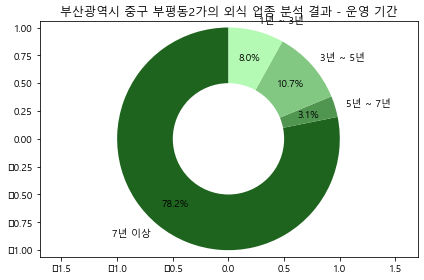

In [235]:
# Pie Chart

labels = df_bupyeong2ga_opened_for_viz.index
sizes = df_bupyeong2ga_opened_for_viz.values
colors = ["#1e641e", "#509650", "#82c882","#b4fab4"]

plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90,frame = True, pctdistance = 0.75)

centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("부산광역시 중구 부평동2가의 외식 업종 분석 결과 - 운영 기간")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [227]:
df_sh_bupyeong2ga_closed = getDFStatusDong(status = "폐업", gu = "중구", dong = "부평동2가", upjong = "외식")
df_sh_bupyeong2ga_closed_section = getDFPeriodSection_New(status = "폐업", df = df_sh_bupyeong2ga_closed)

df_bupyeong2ga_closed_for_viz = df_sh_bupyeong2ga_closed_section.groupby(["폐업_운영_기간_구분"])["폐업_운영_기간(개월)"].count()
df_bupyeong2ga_closed_for_viz = df_bupyeong2ga_closed_for_viz.reindex(index = ["7년 이상", "5년 ~ 7년", "3년 ~ 5년", "1년 ~ 3년", "1년 이하"])
df_bupyeong2ga_closed_for_viz

폐업_운영_기간_구분
7년 이상      104
5년 ~ 7년     11
3년 ~ 5년     28
1년 ~ 3년     32
1년 이하       24
Name: 폐업_운영_기간(개월), dtype: int64

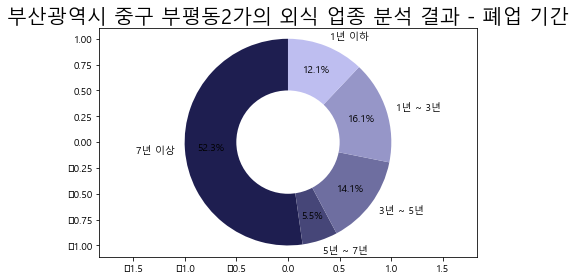

In [228]:
# Pie Chart

labels = df_bupyeong2ga_closed_for_viz.index
sizes = df_bupyeong2ga_closed_for_viz.values
colors = ["#1e1e50", "#464678", "#6e6ea0", "#9696c8", "#bebef0"]

plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90,frame = True, pctdistance = 0.75)

centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("부산광역시 중구 부평동2가의 외식 업종 분석 결과 - 폐업 기간", fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 평균 운영기간 / 평균 폐업기간

In [229]:
bupyeong2ga_avg_open = df_sh_bupyeong2ga_opened_section["영업_운영_기간(개월)"].mean() / 30
bupyeong2ga_avg_closed = df_sh_bupyeong2ga_closed_section["폐업_운영_기간(개월)"].mean() / 30

print(f"부산광역시 중구 부평동2가의 평균 운영 기간은 {round(bupyeong2ga_avg_open, 1)}년입니다. ")
print(f"부산광역시 중구 부평동2가의 평균 폐업 기간은 {round(bupyeong2ga_avg_closed, 1)}년입니다. ")

부산광역시 중구 부평동2가의 평균 운영 기간은 7.3년입니다. 
부산광역시 중구 부평동2가의 평균 폐업 기간은 4.0년입니다. 


---
# 상권변화지표 지도로 분석

---

In [230]:
df_ci2 = pd.read_csv('./data2/부산광역시_상권_변화지표정보_지역구.csv')

In [139]:
df_ci2

,상권_변화_지표_명,상권_코드_명,상권_구분_코드_명,운영_영업_개월_평균,폐업_영업_개월_평균,부산_운영_영업_개월_평균,부산_폐업_영업_개월_평균,지역구
0,전통상권,해운대시장,상권확장,0,120,50,44,해운대구
1,전통상권,학장반도보라상가,다이나믹,30,1,50,44,사상구
2,전통상권,하이타운상가백화점,다이나믹,26,36,50,44,남구
3,전통상권,하단시장,상권축소,57,21,50,44,사하구
4,전통상권,충렬상가시장,상권축소,80,0,50,44,동래구
...,...,...,...,...,...,...,...,...
472,발달상권,기장역,다이나믹,63,44,50,44,기장군
473,발달상권,광안리,상권확장,49,47,50,44,수영구
474,발달상권,경성대부경대역_3,다이나믹,31,31,50,44,남구
475,발달상권,경성대부경대역_2,다이나믹,50,35,50,44,남구


In [477]:
df_ci_gu = pd.crosstab(
  index = df_ci2.지역구,
  columns = df_ci2.상권_구분_코드_명,
  values = df_ci2.상권_구분_코드_명,
  aggfunc = 'count',
).fillna(0).apply(lambda x: x.astype('int64'))
df_ci_gu = df_ci_gu[['다이나믹', '상권확장', '상권축소', '정체']]

df_ci_gu = df_ci_gu.reset_index()
df_ci_gu['상권구분'] = df_ci_gu[df_ci_gu.columns[1:]].apply(lambda x: x.index[x.argmax()], axis = 1)
df_ci_gu['score'] = df_ci_gu['상권구분'].map({'다이나믹' : 4, '상권확장' : 3, '상권축소' : 2, '정체' : 1})

df_ci_gu_for_viz = pd.DataFrame(index = df_ci_gu['지역구'], columns = ['상권구분', 'score'], data = df_ci_gu[['상권구분','score']].values)

In [478]:
df_ci_gu_for_viz

,상권구분,score
지역구,,
강서구,다이나믹,4
금정구,다이나믹,4
기장군,다이나믹,4
남구,상권축소,2
동구,정체,1
동래구,상권축소,2
부산진구,다이나믹,4
북구,상권축소,2
사상구,상권축소,2


In [473]:
geo_path = './data2/busan_gu.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [474]:
map = folium.Map(location = [35.1856505,129.1], zoom_start=11)
map.choropleth(geo_data = geo_str,
               data = df_ci_gu_for_viz['score'],
               columns = [df_ci_gu_for_viz.index, df_ci_gu_for_viz['score']],
               fill_color = "PuRd",
               key_on = "feature.id")
map

<img src="./img/change_index_folium_visualization2.PNG" width="100%">

<!-- <img src="./img/change_index_folium_visualization.PNG" width=100%> -->

---
# 지역별 집객시설

---

In [528]:
df_af2 = df_af.copy()

In [531]:
df_af2

,상권_변화_지표_명,상권_코드_명,집객_시설_수,관공서_수,학교_시설_수,병원_시설_수_1,교통_시설_수,지하철_수,병원_시설_수_2,쇼핑_시설_수
0,골목상권,황령대로489번길,6,0,0,4,2,0,0,0
1,골목상권,황령대로319번가길,21,1,0,5,15,0,0,0
2,골목상권,해운대로81번길,3,1,1,1,0,0,0,0
3,골목상권,해운대로76번길,10,1,0,5,4,0,0,0
4,골목상권,해운대로483번길,2,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
379,전통시장,감전제일상가,1,0,0,0,0,0,0,1
380,전통시장,감만시장,1,0,0,1,0,0,0,0
381,전통시장,가락타운상가시장,8,0,0,1,6,0,0,1
382,전통시장,가남종합시장,1,0,0,0,0,0,0,1


In [536]:
df_af2 = df_af.copy()

df_af2['병원_시설_수'] = df_af2[['병원_시설_수_1', '병원_시설_수_2']].sum(axis = 1)
df_af2 = df_af2[['상권_코드_명', '집객_시설_수', '관공서_수', '학교_시설_수', '병원_시설_수', '교통_시설_수', '쇼핑_시설_수']]

In [537]:
df_af2

,상권_코드_명,집객_시설_수,관공서_수,학교_시설_수,병원_시설_수,교통_시설_수,쇼핑_시설_수
0,황령대로489번길,6,0,0,4,2,0
1,황령대로319번가길,21,1,0,5,15,0
2,해운대로81번길,3,1,1,1,0,0
3,해운대로76번길,10,1,0,5,4,0
4,해운대로483번길,2,0,0,2,0,0
...,...,...,...,...,...,...,...
379,감전제일상가,1,0,0,0,0,1
380,감만시장,1,0,0,1,0,0
381,가락타운상가시장,8,0,0,1,6,1
382,가남종합시장,1,0,0,0,0,1


## 비율로 표현하기

In [563]:
test = df_af2.iloc[:, 2:] / df_af2.iloc[:, 2:].max(axis = 0)
test = test.apply(lambda x : round(x * 100, 2))
test = pd.concat([df_af2.iloc[:, :2], test], axis = 1)
test

,상권_코드_명,집객_시설_수,관공서_수,학교_시설_수,병원_시설_수,교통_시설_수,쇼핑_시설_수
0,황령대로489번길,6,0.0,0.0,1.24,1.87,0.00
1,황령대로319번가길,21,20.0,0.0,1.55,14.02,0.00
2,해운대로81번길,3,20.0,50.0,0.31,0.00,0.00
3,해운대로76번길,10,20.0,0.0,1.55,3.74,0.00
4,해운대로483번길,2,0.0,0.0,0.62,0.00,0.00
...,...,...,...,...,...,...,...
379,감전제일상가,1,0.0,0.0,0.00,0.00,16.67
380,감만시장,1,0.0,0.0,0.31,0.00,0.00
381,가락타운상가시장,8,0.0,0.0,0.31,5.61,16.67
382,가남종합시장,1,0.0,0.0,0.00,0.00,16.67


## 4분위수로 표현하기
- 관공서, 학교 수는 25%, 50%, 75% 값이 모두 0이고, 쇼핑은 0, 0, 1이다.
- 병원, 교통도 각각 0, 2, 9와 0, 1, 8인데 max는 323과 107로, 매우 비대칭적이다.

In [527]:
df_af2.describe()

,집객_시설_수,관공서_수,학교_시설_수,병원_시설_수,교통_시설_수,쇼핑_시설_수
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,20.898438,0.354167,0.054688,12.640625,7.291667,0.557292
std,41.681029,0.747202,0.259803,28.655895,15.210562,0.991793
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,2.000000,1.000000,0.000000
75%,20.000000,0.000000,0.000000,9.000000,8.000000,1.000000
max,434.000000,5.000000,2.000000,323.000000,107.000000,6.000000


In [556]:
# 갯수 (count)
def getSangGwon5_count(i):
  name = df_af2.iloc[i]['상권_코드_명']
  af = df_af2.iloc[i][2:].values.astype(int)
  return name, af

In [557]:
# 비율 (ratio)
def getSangGwon5_ratio(i):
  name = test.iloc[i]['상권_코드_명']
  af = test.iloc[i][2:].values.astype(int)
  return name, af

In [558]:
import plotly.graph_objects as go

categories = ['관공서', '학교', '병원', '교통', '쇼핑']
# sg_mean_score = test.mean(axis = 0)[1:].values # 전체 평균
# sg_name, sg_score = getSangGwon5(150) # 남항로9번길 - 평균에 비해 매우 작음
sg_name, sg_score = getSangGwon5_count(265) # 부산 부산진구 부전역_2 - 평균과 비슷
# sg_name, sg_score = getSangGwon5(262) # 부산 부산진구 서면역_3 - 평균에 비해 매우 큼

# ---------------------
# 이 위까지 api로 호출 가능

categories = [*categories, categories[0]]
# sg_mean_score = [*sg_mean_score, sg_mean_score[0]]
sg_score = [*sg_score, sg_score[0]]

fig = go.Figure(
  data = [
    # go.Scatterpolar(r = sg_mean_score, theta = categories, fill = 'toself', name = '부산 상권 평균'), # 전체 평균
    go.Scatterpolar(r = sg_score, theta = categories, fill = 'toself', name = sg_name),
  ],
  layout = go.Layout(
    title = go.layout.Title(text = '부산광역시 ' + sg_name + ' 집객시설 수'),
    polar = {'radialaxis': {'visible': True}},
    showlegend = True
  )
)

fig.show()

In [565]:
import plotly.graph_objects as go

categories = ['관공서', '학교', '병원', '교통', '쇼핑']
# sg_mean_score = test.mean(axis = 0)[1:].values # 전체 평균
# sg_name, sg_score = getSangGwon5_ratio(150) # 남항로9번길 - 평균에 비해 매우 작음
sg_name, sg_score = getSangGwon5_ratio(265) # 부산 부산진구 부전역_2 - 평균과 비슷
# sg_name, sg_score = getSangGwon5_ratio(262) # 부산 부산진구 서면역_3 - 평균에 비해 매우 큼

# ---------------------
# 이 위까지 api로 호출 가능

categories = [*categories, categories[0]]
# sg_mean_score = [*sg_mean_score, sg_mean_score[0]]
sg_score = [*sg_score, sg_score[0]]

fig = go.Figure(
  data = [
    # go.Scatterpolar(r = sg_mean_score, theta = categories, fill = 'toself', name = '부산 상권 평균'), # 전체 평균
    go.Scatterpolar(r = sg_score, theta = categories, fill = 'toself', name = sg_name),
  ],
  layout = go.Layout(
    title = go.layout.Title(text = '부산광역시 ' + sg_name + ' 집객시설 수'),
    polar = {'radialaxis': {'visible': True}},
    showlegend = True
  )
) 

fig.show()

<!-- <img src="./img/attractive_facility_bujeon_5.PNG" width=100%> -->

In [149]:
df_af3 = df_af2[['상권_코드_명', '관공서_수', '병원_시설_수', '교통_시설_수']]
df_af3

,상권_코드_명,관공서_수,병원_시설_수,교통_시설_수
0,황령대로489번길,0,4,2
1,황령대로319번가길,1,5,15
2,해운대로81번길,1,1,0
3,해운대로76번길,1,5,4
4,해운대로483번길,0,2,0
...,...,...,...,...
379,감전제일상가,0,0,0
380,감만시장,0,1,0
381,가락타운상가시장,0,1,6
382,가남종합시장,0,0,0


In [150]:
def getSangGwon3(i):
  name = df_af3.iloc[i]['상권_코드_명']
  af = df_af3.iloc[i][1:].values.astype(int)
  return name, af

In [151]:
import plotly.graph_objects as go

categories = ['관공서', '병원', '교통']
categories = [*categories, categories[0]]

sg_mean_score = df_af3.mean(axis = 0).values
sg_mean_score = [*sg_mean_score, sg_mean_score[0]]

# sg_name, sg_score = getSangGwon3(150) # 남항로9번길 - 평균에 비해 매우 작음
sg_name, sg_score = getSangGwon3(265) # 부산 부산진구 부전역_2 - 평균과 비슷
# sg_name, sg_score = getSangGwon3(262) # 부산 부산진구 서면역_3 - 평균에 비해 매우 큼

sg_score = [*sg_score, sg_score[0]]

fig = go.Figure(
  data = [
    go.Scatterpolar(r = sg_mean_score, theta = categories, fill = 'toself', name = '부산 상권 평균'), # 전체 평균
    go.Scatterpolar(r = sg_score, theta = categories, fill = 'toself', name = sg_name),
  ],
  layout = go.Layout(
    title = go.layout.Title(text = '부산광역시 ' + sg_name + ' 집객시설 수'),
    polar = {'radialaxis': {'visible': True}},
    showlegend = True
  )
)

fig.show()

<img src="./img/attractive_facility_bujeon_3.PNG" width=100%>